# Pixel Intensity-Based Colocalization

<div class="custom-button-row">
    <a 
        class="custom-button custom-download-button" href="../../../notebooks/08_colocalization/pixel_intensity_based_colocalization.ipynb" download>
        <i class="fas fa-download"></i> Download this Notebook
    </a>
    <a
    class="custom-button custom-download-button" href="https://colab.research.google.com/github/HMS-IAC/bobiac/blob/gh-pages/colab_notebooks/08_colocalization/pixel_intensity_based_colocalization.ipynb" target="_blank">
        <img class="button-icon" src="../../../_static/logo/icon-google-colab.svg" alt="Open in Colab">
        Open in Colab
    </a>
</div>

In [ ]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "matplotlib",
#     "ndv[jupyter,vispy]",
#     "scikit-image",
#     "scipy",
#     "tifffile",
#     "imagecodecs",
# ]
# ///

In [35]:
import matplotlib.pyplot as plt
import ndv
import numpy as np
import tifffile
from scipy.stats import pearsonr
from skimage.filters import threshold_otsu

In [ ]:
img_path = "../../_static/images/coloc/14na_z4.tif"
img = tifffile.imread(img_path)

In [ ]:
ndv.imshow(img)

In [ ]:
viewer = ndv.imshow(img)

In [ ]:
viewer.widget().children[1].snapshot()

In [ ]:
ch1 = img[0]
ch2 = img[1]

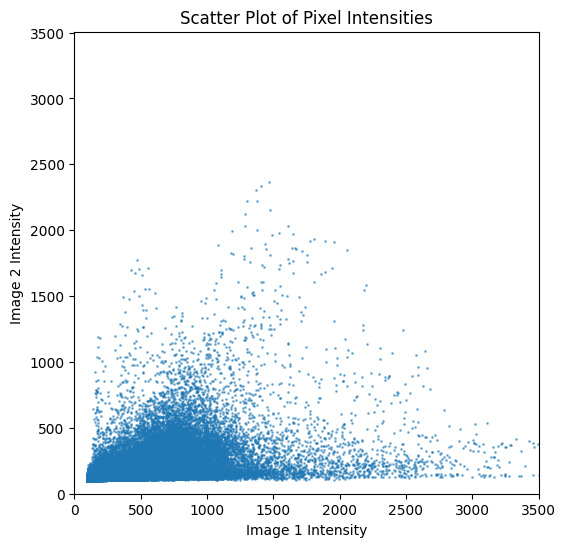

In [29]:
# plot scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(ch1.flatten(), ch2.flatten(), s=1, alpha=0.5)
plt.xlabel("Image 1 Intensity")
plt.ylabel("Image 2 Intensity")
plt.title("Scatter Plot of Pixel Intensities")
# set both axes to the same range based on the maximum value
max_intensity = max(ch1.max(), ch2.max())
plt.xlim(0, max_intensity)
plt.ylim(0, max_intensity)
plt.show()

<!-- <div align="center"> <img src="https://raw.githubusercontent.com/HMS-IAC/bobiac/main/_static/images/coloc/pearsons.png" alt="Ilastik Logo" width="600"></div> -->
<div align="left"> <img src="../../_static/images/coloc/pearsons.png" alt="Ilastik Logo" width="600"></div>

In [42]:
mean_ch1 = np.mean(ch1)
mean_ch2 = np.mean(ch2)

numerator = np.sum((ch1 - mean_ch1) * (ch2 - mean_ch2))
denominator = np.sqrt(np.sum((ch1 - mean_ch1) ** 2) * np.sum((ch2 - mean_ch2) ** 2))
prs = numerator / denominator
print(f"Pearson's correlation coefficient: {prs:.4f}")

pearson, p_value = pearsonr(ch1.flatten(), ch2.flatten())
print(f"Pearson's correlation coefficient (scipy): {pearson:.4f}")

Pearson's correlation coefficient: 0.5383
Pearson's correlation coefficient (scipy): 0.5383


In [ ]:
# calculate pearsons on thresholded images
image_1_mask = ch1 > threshold_otsu(ch1)
image_2_mask = ch2 > threshold_otsu(ch2)

# get the overlap mask
overlap_mask = image_1_mask & image_2_mask

# extract intensity from channel 1 only at pixels where both channels overlap
image_1_masked = ch1[overlap_mask]
# extract intensity from channel 2 only at pixels where both channels overlap
image_2_masked = ch2[overlap_mask]

3498


<!-- <div align="center"> <img src="https://raw.githubusercontent.com/HMS-IAC/bobiac/main/_static/images/coloc/manders.png" alt="Ilastik Logo" width="600"></div> -->
<div align="left"> <img src="../../_static/images/coloc/manders.png" alt="Ilastik Logo" width="600"></div>

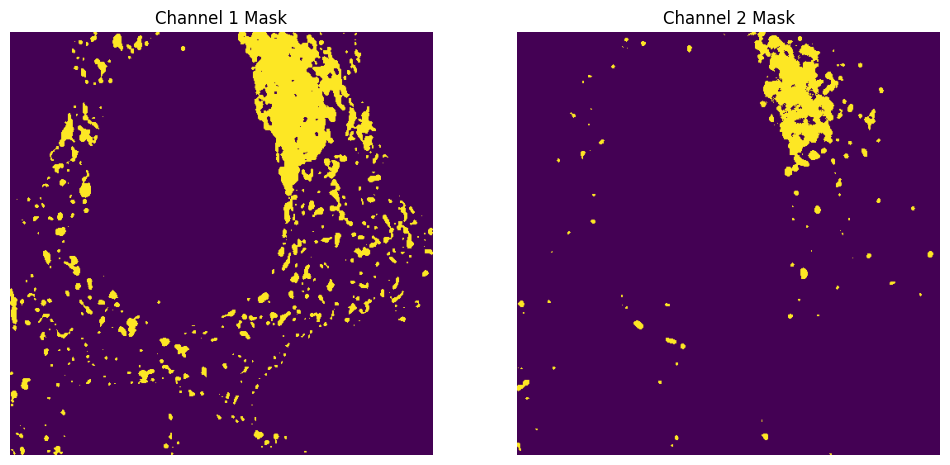

In [39]:
# create binary masks based on thresholds
image_1_mask = ch1 > threshold_otsu(ch1)
image_2_mask = ch2 > threshold_otsu(ch2)

# plot both channels with masks
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image_1_mask)
ax[0].set_title("Channel 1 Mask")
# hide axes
ax[0].axis("off")
ax[1].imshow(image_2_mask)
ax[1].set_title("Channel 2 Mask")
# hide axes
ax[1].axis("off")
plt.show()

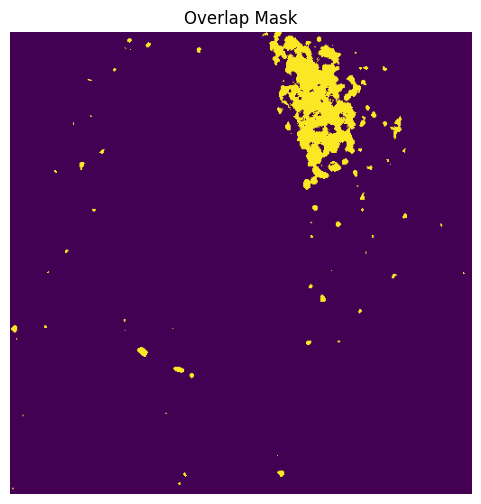

In [ ]:
# only consider pixels within the mask (keep intensities above threshold, zero elsewhere)
ch1_tr = np.where(image_1_mask, ch1, 0)
ch2_tr = np.where(image_2_mask, ch2, 0)

# get the overlap mask
overlap_mask = image_1_mask & image_2_mask

# plot overlap mask
plt.figure(figsize=(6, 6))
plt.imshow(overlap_mask)
plt.title("Overlap Mask")
plt.axis("off")
plt.show()

In [50]:
# extract intensity from channel 1 only at pixels where both channels overlap
ch1_overlap_with_ch2 = ch1[overlap_mask]
# extract intensity from channel 2 only at pixels where both channels overlap
ch2_overlap_with_ch1 = ch2[overlap_mask]

# calculate the sum of the masked images
sum_ch1_tr = np.sum(ch1_tr)
sum_ch2_tr = np.sum(ch2_tr)

# calculate the Manders coefficients
M1 = np.sum(ch1_overlap_with_ch2) / sum_ch1_tr
M2 = np.sum(ch2_overlap_with_ch1) / sum_ch2_tr

print(f"Manders coefficient M1: {M1:.4f}")
print(f"Manders coefficient M2: {M2:.4f}")

Manders coefficient M1: 0.3496
Manders coefficient M2: 0.8975


In [ ]:
# # USE NUMPY WHERE TO GET OVERLAP INTENSITIES

# # only consider pixels within the mask (keep intensities above threshold, zero elsewhere)
# ch1_tr = np.where(image_1_mask, ch1, 0)
# ch2_tr = np.where(image_2_mask, ch2, 0)

# # find overlapping regions
# # use intensity values from ch1 (above threshold) ONLY where ch2 > 0
# ch1_overlap_with_ch2 = np.where(image_2_mask, ch1_tr, 0)
# # use intensity values from ch2 (above threshold) ONLY where ch1 > 0
# ch2_overlap_with_ch1 = np.where(image_1_mask, ch2_tr, 0)

# # calculate the sum of the masked images
# sum_ch1_tr = np.sum(ch1_tr)
# sum_ch2_tr = np.sum(ch2_tr)

# # calculate the Manders coefficients
# M1 = np.sum(ch1_overlap_with_ch2) / sum_ch1_tr
# M2 = np.sum(ch2_overlap_with_ch1) / sum_ch2_tr

# print(f"Manders coefficient M1: {M1:.4f}")
# print(f"Manders coefficient M2: {M2:.4f}")

Manders coefficient M1: 0.3496
Manders coefficient M2: 0.8975
